In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
data = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31aug18/SalishSea_1d_20180831_20180831_grid_T.nc')
data 

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2018-08-31T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20180801_20180831_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-26 08:33:41 GMT
    uuid:         2296944d-506f-48e7-8fb1-fec86ffdd908

In [5]:
def planview(base, field, it, ide, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.y, data.values, cmap=cmap, norm = norm_data)
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.x, data.y, data.values, levels=[contour_value], colors='green')
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title(f'August31-2018 {field} at Depth 45m')
    axs.scatter(304 - 270, 446 - 420, marker = 'x', color = 'yellow')
    axs.scatter(304 - 270, 447 - 420, marker = 'x', color = 'yellow')
    axs.scatter(305 - 270, 446 - 420, marker = 'x', color = 'yellow')
    axs.scatter(305 - 270, 447 - 420, marker = 'x', color = 'yellow')

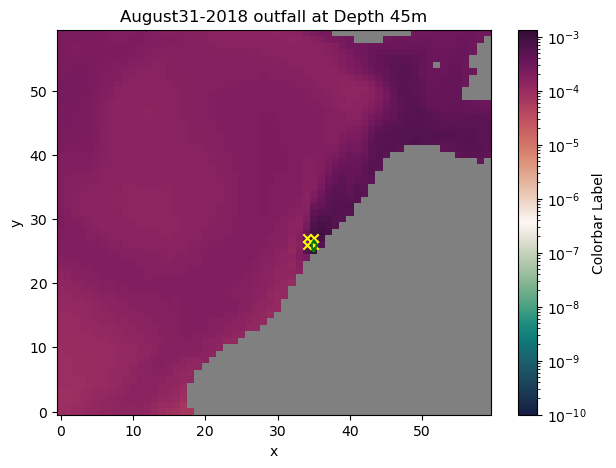

In [6]:
planview(data, 'outfall', 0, 23, cm_vel)

In [7]:
def verticalview(base, field, it, dep, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, :29, dep, 250+iz:350-iz]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.x, data.deptht, data.values, levels=[contour_value], colors='green')
    axs.invert_yaxis()
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('depth')
    axs.set_title(f'August31-2018 {field} at Depth 45m')
    if dep == 446:
        axs.scatter(304 - 270, 98, marker = 'x', color = 'yellow')
        axs.scatter(305 - 270, 76, marker = 'x', color = 'yellow')
    else: 
        axs.scatter(304 - 270, 121, marker = 'x', color = 'yellow')
        axs.scatter(305 - 270, 98, marker = 'x', color = 'yellow')

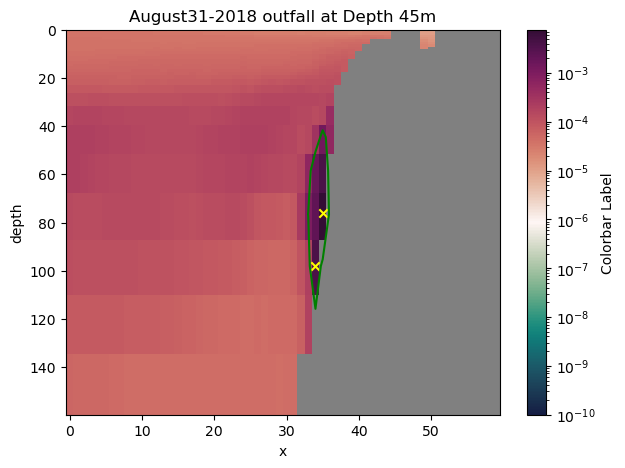

In [8]:
verticalview(data, 'outfall', 0, 446, cm_vel)

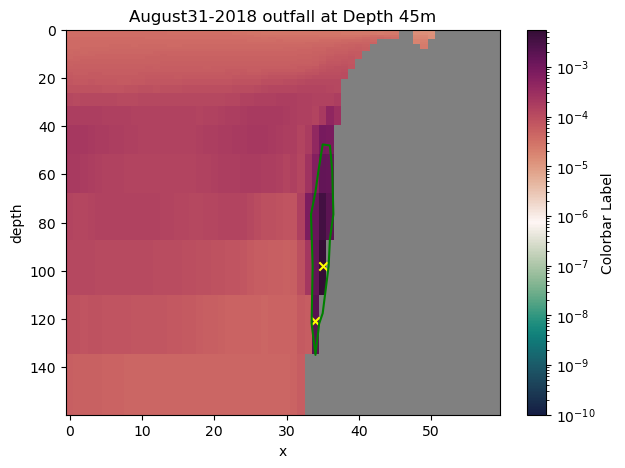

In [9]:
verticalview(data, 'outfall', 0, 447, cm_vel)

In [10]:
def vertical_view_x(base, field, it, dep,  cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, :29, 400+iz:500-iz, dep]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.y, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.y, data.deptht, data.values, levels=[contour_value], colors='green')
    axs.invert_yaxis() 
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('y')
    axs.set_ylabel('log-depth')
    axs.set_title(f'July26-2018 {field} at Depth 45m')
    if dep == 304:
        axs.scatter(447 - 420, 121, marker = 'x', color = 'yellow')
        axs.scatter(446 - 420, 98, marker = 'x', color = 'yellow')
    else:
        axs.scatter(447 - 420, 98, marker = 'x', color = 'yellow')
        axs.scatter(446 - 420, 76, marker = 'x', color = 'yellow')

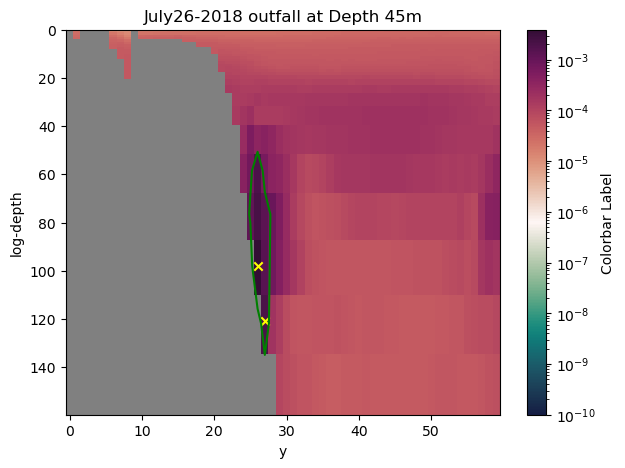

In [11]:
vertical_view_x(data, 'outfall', 0, 304,  cm_vel)

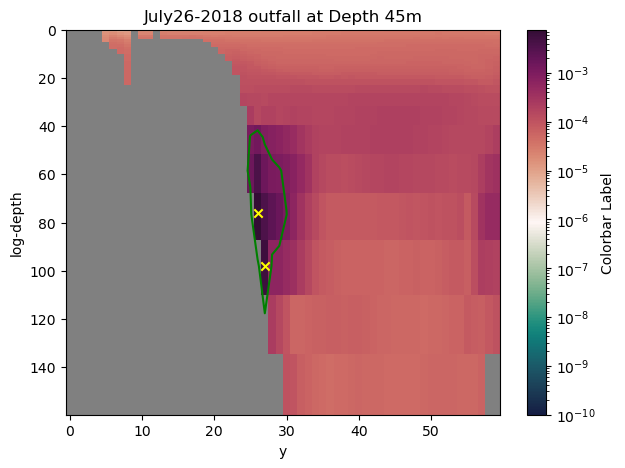

In [12]:
vertical_view_x(data, 'outfall', 0, 305,  cm_vel)

In [4]:
file_pattern = '/data/sallen/results/MEOPAR/wastewater/long_run/*aug18/SalishSea_1d_201808[0-3][0-9]_201808[0-3][0-9]_grid_T.nc'
file_list = glob.glob(file_pattern)

aug31 = xr.open_mfdataset(file_list, data_vars=['outfall'])  
aug31

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 31)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2018-08-01T12:00:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    bounds_nav_lat        (y, x, nvertex) float32 dask.array<chunksize=(898, 398, 4), meta=np.ndarray>
    area                  (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(40, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    sigma_theta           (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    e3t                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    outfall               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20180801_20180831_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-25 18:02:59 GMT
    uuid:         eed46ca2-47f4-41cf-9c2a-c6d98f8ea960

In [5]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
data_slice = aug31.isel(y = y_slice, x = x_slice) 

In [6]:
def plotAvgDiffTime(new, field, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    offset = 1e-10
    norm_data = colors.LogNorm(vmin=new[field].values.min() + offset, vmax=new[field].values.max() + offset)
    new_avg = (new[field] * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
    print(new_avg)
    new_avg.plot(ax=axs, y = "deptht", yincrease = False, cmap=cmp, norm = norm_data, shading='auto')
    max_depth = new_avg.argmax(dim = 'deptht')
    axs.plot(new_avg['time_counter'], new_avg['deptht'][max_depth], 'y-')
    axs.set_title(f'Time Series for average difference in {field}')
    axs.set_ylim(150, 0)

<xarray.DataArray (time_counter: 31, deptht: 40)>
dask.array<truediv, shape=(31, 40), dtype=float64, chunksize=(1, 40), chunktype=numpy.ndarray>
Coordinates:
  * deptht         (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2018-08-01T12:00:00 ... 2018...


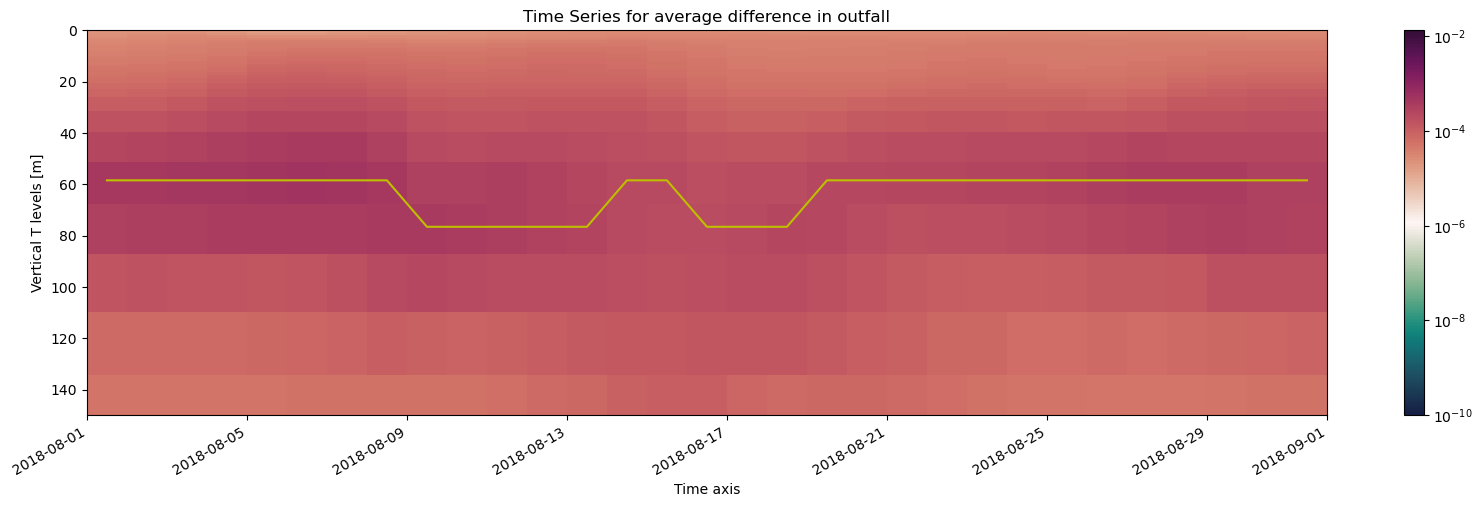

In [11]:
plotAvgDiffTime(data_slice, 'outfall', cm_vel)

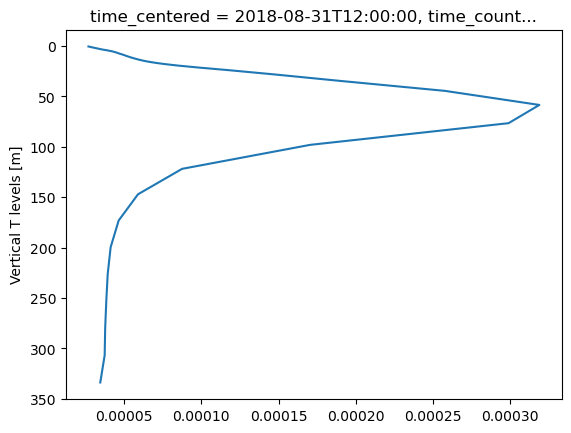

In [8]:
new_avg = (data_slice['outfall'] * area.isel(y = y_slice, x = x_slice)).where(tmask.isel(y = y_slice, x = x_slice)).mean(axis = 2).mean(axis = 2) / area.isel(y = y_slice, x = x_slice).where(tmask.isel(y = y_slice, x = x_slice)).mean()
new_avg[30,:].plot(y = 'deptht', yincrease = False)